# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Brandon Shellenberger
### GitHub Link: https://github.com/Bshell13/shellenberger_module_06

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

#### Question 1
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
import pickle

response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

print(response.status_code)
print(response.headers['content-type'])

with open('shellenberger_module_06.pkl', 'wb') as file:
    pickle.dump(response.text, file)


200
text/html; charset=UTF-8


#### Question 2
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
from bs4 import BeautifulSoup

with open('shellenberger_module_06.pkl', 'rb') as file:
    article_html = pickle.load(file)

parser = 'html.parser'
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')
article_text = article_element.get_text()
print(article_text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

#### Question 3
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

nlp = spacy.load('en_core_web_sm') #Make sure to download en_core_web_sm from spacy in the terminal
nlp.add_pipe('spacytextblob')
doc = nlp(article_text)

# Cannot use 'token.lower()' or error will show saying "'int' object is not callable"
interesting_token = [token.text.lower() for token in doc if not (token.is_space or token.is_punct or token.is_stop)] #Takes out white space, punctuation, and stopwords
word_freq = Counter(interesting_token) # Counts each token
most_common = word_freq.most_common(5) # Displays the top 5 most frequent token

for word, freq in most_common:
    print(f'The word {word} shows up {freq} times in the article')

The word laser shows up 35 times in the article
The word headlights shows up 19 times in the article
The word headlight shows up 11 times in the article
The word technology shows up 10 times in the article
The word led shows up 10 times in the article


#### Question 4
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
interesting_lemma_token = [token.lemma_.lower() for token in doc if not (token.is_space or token.is_punct or token.is_stop)] #Takes out white space, punctuation, and stopwords
lemma_freq = Counter(interesting_lemma_token) # Counts each token
most_common_lemma = lemma_freq.most_common(5) # Displays the top 5 most frequent token

for word_lemma, freq_lemma in most_common_lemma:
    print(f'The word {word_lemma} shows up {freq_lemma} times in the article')

The word laser shows up 40 times in the article
The word headlight shows up 28 times in the article
The word beam shows up 12 times in the article
The word technology shows up 10 times in the article
The word led shows up 10 times in the article


#### Question 5
Define the following methods:
- `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
- `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [16]:
def token_count(sent):
    '''
    Counts the number of tokens in a sentence
    with no punctuation and no white space
    returns counts'''
    count = 0
    for token in sent:
        if not(token.is_punct or token.is_space):
            count+=1
    return count

def score_sentence_by_token(sent, word):
    '''
    Counts the nubmer of tokens compared to
    the most common words from Q3
    prints the ratio compared to total tokens'''
    count = 0
    for token in sent:
        if token.text.lower() in word:
            count+=1
    sent_length = token_count(sent)
    return count/sent_length

def score_sentence_by_lemma(sent, word):
    '''
    Counts the nubmer of lemmas compared to
    the most common lemmas from Q4
    prints the ratio compared to total tokens'''
    count = 0
    for token in sent:
        if token.text.lower() in word:
            count+=1
    sent_length = token_count(sent)
    return count/sent_length

sentences = list(doc.sents) # seperates sentences into a list
first = sentences[0] #selects the first sentence of the list
most_common_word = [word for word, freq in most_common]
    # Selects the words from the most_common variable from Q3 and puts it into the list
most_common_word_lemma = [word for word, freq in most_common_lemma]
    # Selects the words from the most_common_lemma variable from Q4 and puts it into the list
first_sentence_score = score_sentence_by_token(first, most_common_word)
print(f'Token score for the first sentence: {first_sentence_score}')
first_sentence_score_lemma = score_sentence_by_lemma(first, most_common_word_lemma)
print(f'Token score for the first sentence: {first_sentence_score_lemma}')

Token score for the first sentence: 0.12121212121212122
Token score for the first sentence: 0.06060606060606061


#### Question 6
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Text(0, 0.5, 'Frequency')

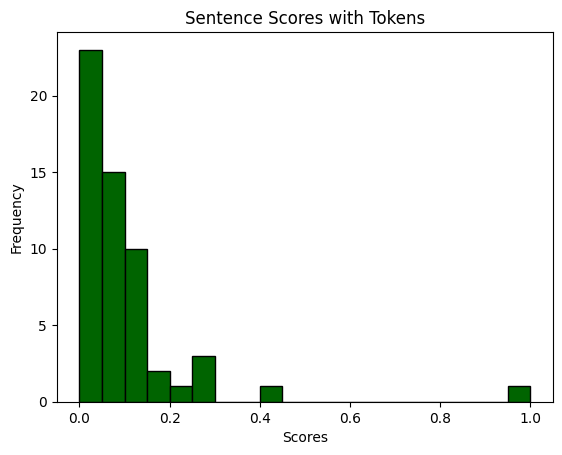

In [34]:
import matplotlib.pyplot as plt

most_common_scores = [score_sentence_by_token(sent, most_common_word) for sent in sentences]
plt.hist(most_common_scores, bins=20, color='darkgreen', edgecolor='black')
plt.title('Sentence Scores with Tokens')
plt.xlabel('Scores')
plt.ylabel('Frequency')

The most common range of scores is between 0 and 0.05.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).